In [1]:
import jar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
with open('pickles/100pagesWPUB.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 108 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   link                 10019 non-null  object 
 1   rank                 10019 non-null  float64
 2   desc                 10019 non-null  object 
 3   geek                 10019 non-null  float64
 4   rating               10019 non-null  float64
 5   num_voters           10019 non-null  int64  
 6   price                10019 non-null  object 
 7   average              10019 non-null  object 
 8   avgweight            10019 non-null  object 
 9   baverage             10019 non-null  float64
 10  maxplayers           10018 non-null  float64
 11  maxplaytime          10018 non-null  float64
 12  minage               10018 non-null  float64
 13  minplayers           10018 non-null  float64
 14  minplaytime          10018 non-null  float64
 15  numcomments          10019 non-null

In [163]:
df.sort_values(by='rank')

,link,rank,desc,geek,rating,num_voters,price,average,avgweight,baverage,...,thematic_pub,war_pub,party_pub,abstract_pub,numpub,yearpublished_dt,diff_des,diff_pub,quality_des,quality_pub
7073,/boardgame/174430/gloomhaven,1.0,Gloomhaven\n(2017)\n\n\n\t\t\tVanquish monster...,8.566,8.81,38040,/boardgame/174430/gloomhaven/marketplace/geekm...,8.81498,3.8442,8.56626,...,0.400000,0.000000,0.000000,0.000000,5.0,2017-01-01,0.970000,0.990000,1,1
1073,/boardgame/161936/pandemic-legacy-season-1,2.0,Pandemic Legacy: Season 1\n(2015)\n\n\n\t\t\tM...,8.469,8.62,39014,/boardgame/161936/pandemic-legacy-season-1/mar...,8.61919,2.8318,8.46856,...,0.245283,0.094340,0.037736,0.094340,53.0,2015-01-01,1.490588,1.880566,1,1
2717,/boardgame/224517/brass-birmingham,3.0,Brass: Birmingham\n(2018)\n\n\n\t\t\tBuild you...,8.318,8.64,15489,/boardgame/224517/brass-birmingham/marketplace...,8.64397,3.9191,8.31781,...,0.181818,0.272727,0.000000,0.090909,11.0,2018-01-01,1.216667,0.785455,1,1
7831,/boardgame/167791/terraforming-mars,4.0,Terraforming Mars\n(2016)\n\n\n\t\t\tCompete w...,8.282,8.43,58812,/boardgame/167791/terraforming-mars/marketplac...,8.4315,3.2357,8.28199,...,0.500000,0.166667,0.000000,0.000000,6.0,2016-01-01,1.026667,1.421667,1,1
1634,/boardgame/233078/twilight-imperium-fourth-edi...,5.0,Twilight Imperium (Fourth Edition)\n(2017)\n\n...,8.221,8.69,11926,/boardgame/233078/twilight-imperium-fourth-edi...,8.68962,4.2109,8.22085,...,0.592593,0.138889,0.009259,0.009259,108.0,2017-01-01,0.000000,1.500926,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,/boardgame/143674/give-me-five,9996.0,Give Me Five\n(2013),5.547,6.51,71,/boardgame/143674/give-me-five/marketplace/gee...,6.5107,1,5.54653,...,0.071429,0.071429,0.285714,0.000000,14.0,2013-01-01,-0.905000,-0.082857,0,0
7717,/boardgame/11632/gute-nachbarn,9997.0,Gute Nachbarn\n(1986),5.547,6.41,77,/boardgame/11632/gute-nachbarn/marketplace/gee...,6.41078,1.1429,5.54653,...,0.000000,0.000000,0.000000,1.000000,1.0,1986-01-01,0.103529,0.000000,1,1
2119,/boardgame/244716/machi-koro-fussball,9998.0,Machi Koro Fussball\n(2018),5.546,6.64,63,/boardgame/244716/machi-koro-fussball/marketpl...,6.64032,0,5.54647,...,0.082645,0.132231,0.033058,0.140496,121.0,2018-01-01,0.132000,-0.100083,1,0
9483,/boardgame/268665/suzume-jong,9999.0,Suzume-Jong\n(2018),5.546,6.93,53,/boardgame/268665/suzume-jong/marketplace/geek...,6.93019,2,5.54645,...,0.000000,0.000000,0.000000,1.000000,1.0,2018-01-01,0.475000,0.000000,1,1


In [4]:
df.price_mkt.describe()

count    3332.000000
mean       50.676516
std        54.082148
min         0.990000
25%        20.975000
50%        36.000000
75%        60.000000
max       850.000000
Name: price_mkt, dtype: float64

In [5]:
df=df[df.yearpublished.notna()]

In [6]:
df['yearpublished_dt'] = pd.to_datetime(df.yearpublished, format = '%Y', errors='coerce')
df['yearpublished'] = df['yearpublished'].astype(float)
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10018
Data columns (total 109 columns):
 #   Column               Dtype         
---  ------               -----         
 0   link                 object        
 1   rank                 float64       
 2   desc                 object        
 3   geek                 float64       
 4   rating               float64       
 5   num_voters           int64         
 6   price                object        
 7   average              object        
 8   avgweight            object        
 9   baverage             float64       
 10  maxplayers           float64       
 11  maxplaytime          float64       
 12  minage               float64       
 13  minplayers           float64       
 14  minplaytime          float64       
 15  numcomments          float64       
 16  numfans              float64       
 17  numgeeklists         float64       
 18  numhasparts          float64       
 19  numowned             flo

## Feature Engineering 
### Deviation Feature
Let's observe how an individual game's rating deviates from the mean of its designer and publisher

In [7]:
df['diff_des'] = df['rating'] - df['rating_des']
df['diff_pub'] = df['rating'] - df['rating_pub']

In [8]:
df['quality_des'] = np.where(df['diff_des']>=0, 1, 0)
df['quality_pub'] = np.where(df['diff_pub']>=0, 1, 0)


#df['quality_des'] = np.where(df['diff_des']<0, -1, df.diff_des)

In [9]:
df.quality_des, df.quality_pub

(0        1
 1        1
 2        0
 3        1
 4        0
         ..
 10014    1
 10015    1
 10016    1
 10017    1
 10018    1
 Name: quality_des, Length: 10018, dtype: int64,
 0        1
 1        1
 2        0
 3        1
 4        0
         ..
 10014    1
 10015    1
 10016    1
 10017    1
 10018    1
 Name: quality_pub, Length: 10018, dtype: int64)

In [9]:
time_sorted = df.sort_values(by='yearpublished_dt')
time_sorted.tail()

,link,rank,desc,geek,rating,num_voters,price,average,avgweight,baverage,...,thematic_pub,war_pub,party_pub,abstract_pub,numpub,yearpublished_dt,diff_des,diff_pub,quality_des,quality_pub
9491,/boardgame/156878/tummple,6382.0,tummple!\n\n\n\t\t\tBuilding a delicate tower ...,5.615,6.49,210,/boardgame/156878/tummple/marketplace/geekmarket,6.4941,1,5.61509,...,0.0,1.0,0.0,0.0,1.0,NaT,0.0,0.000,1,1
9571,/boardgame/24207/burger-quiz,6905.0,Burger Quiz,5.600,6.69,149,/boardgame/24207/burger-quiz/marketplace/geekm...,6.69376,1.8,5.59990,...,0.0,0.5,0.0,0.5,2.0,NaT,0.0,0.195,1,1
9695,/boardgame/158876/british-vs-pirates-volume-1,7695.0,British Vs Pirates: Volume 1,5.581,7.36,84,/boardgame/158876/british-vs-pirates-volume-1/...,7.36226,2.5,5.58100,...,0.0,0.0,0.0,0.0,1.0,NaT,0.0,0.000,1,1
9952,/boardgame/194777/rabbit-island-explore-build-...,9561.0,"Rabbit Island: Explore, Build, Conquer!",5.552,7.17,49,/boardgame/194777/rabbit-island-explore-build-...,7.16735,2,5.55162,...,0.0,1.0,0.0,0.0,1.0,NaT,0.0,0.000,1,1
9970,/boardgame/175327/wrathborne-champions,9658.0,Wrathborne Champions,5.550,7.52,50,/boardgame/175327/wrathborne-champions/marketp...,7.52,2,5.55026,...,0.0,1.0,0.0,0.0,1.0,NaT,0.0,0.000,1,1


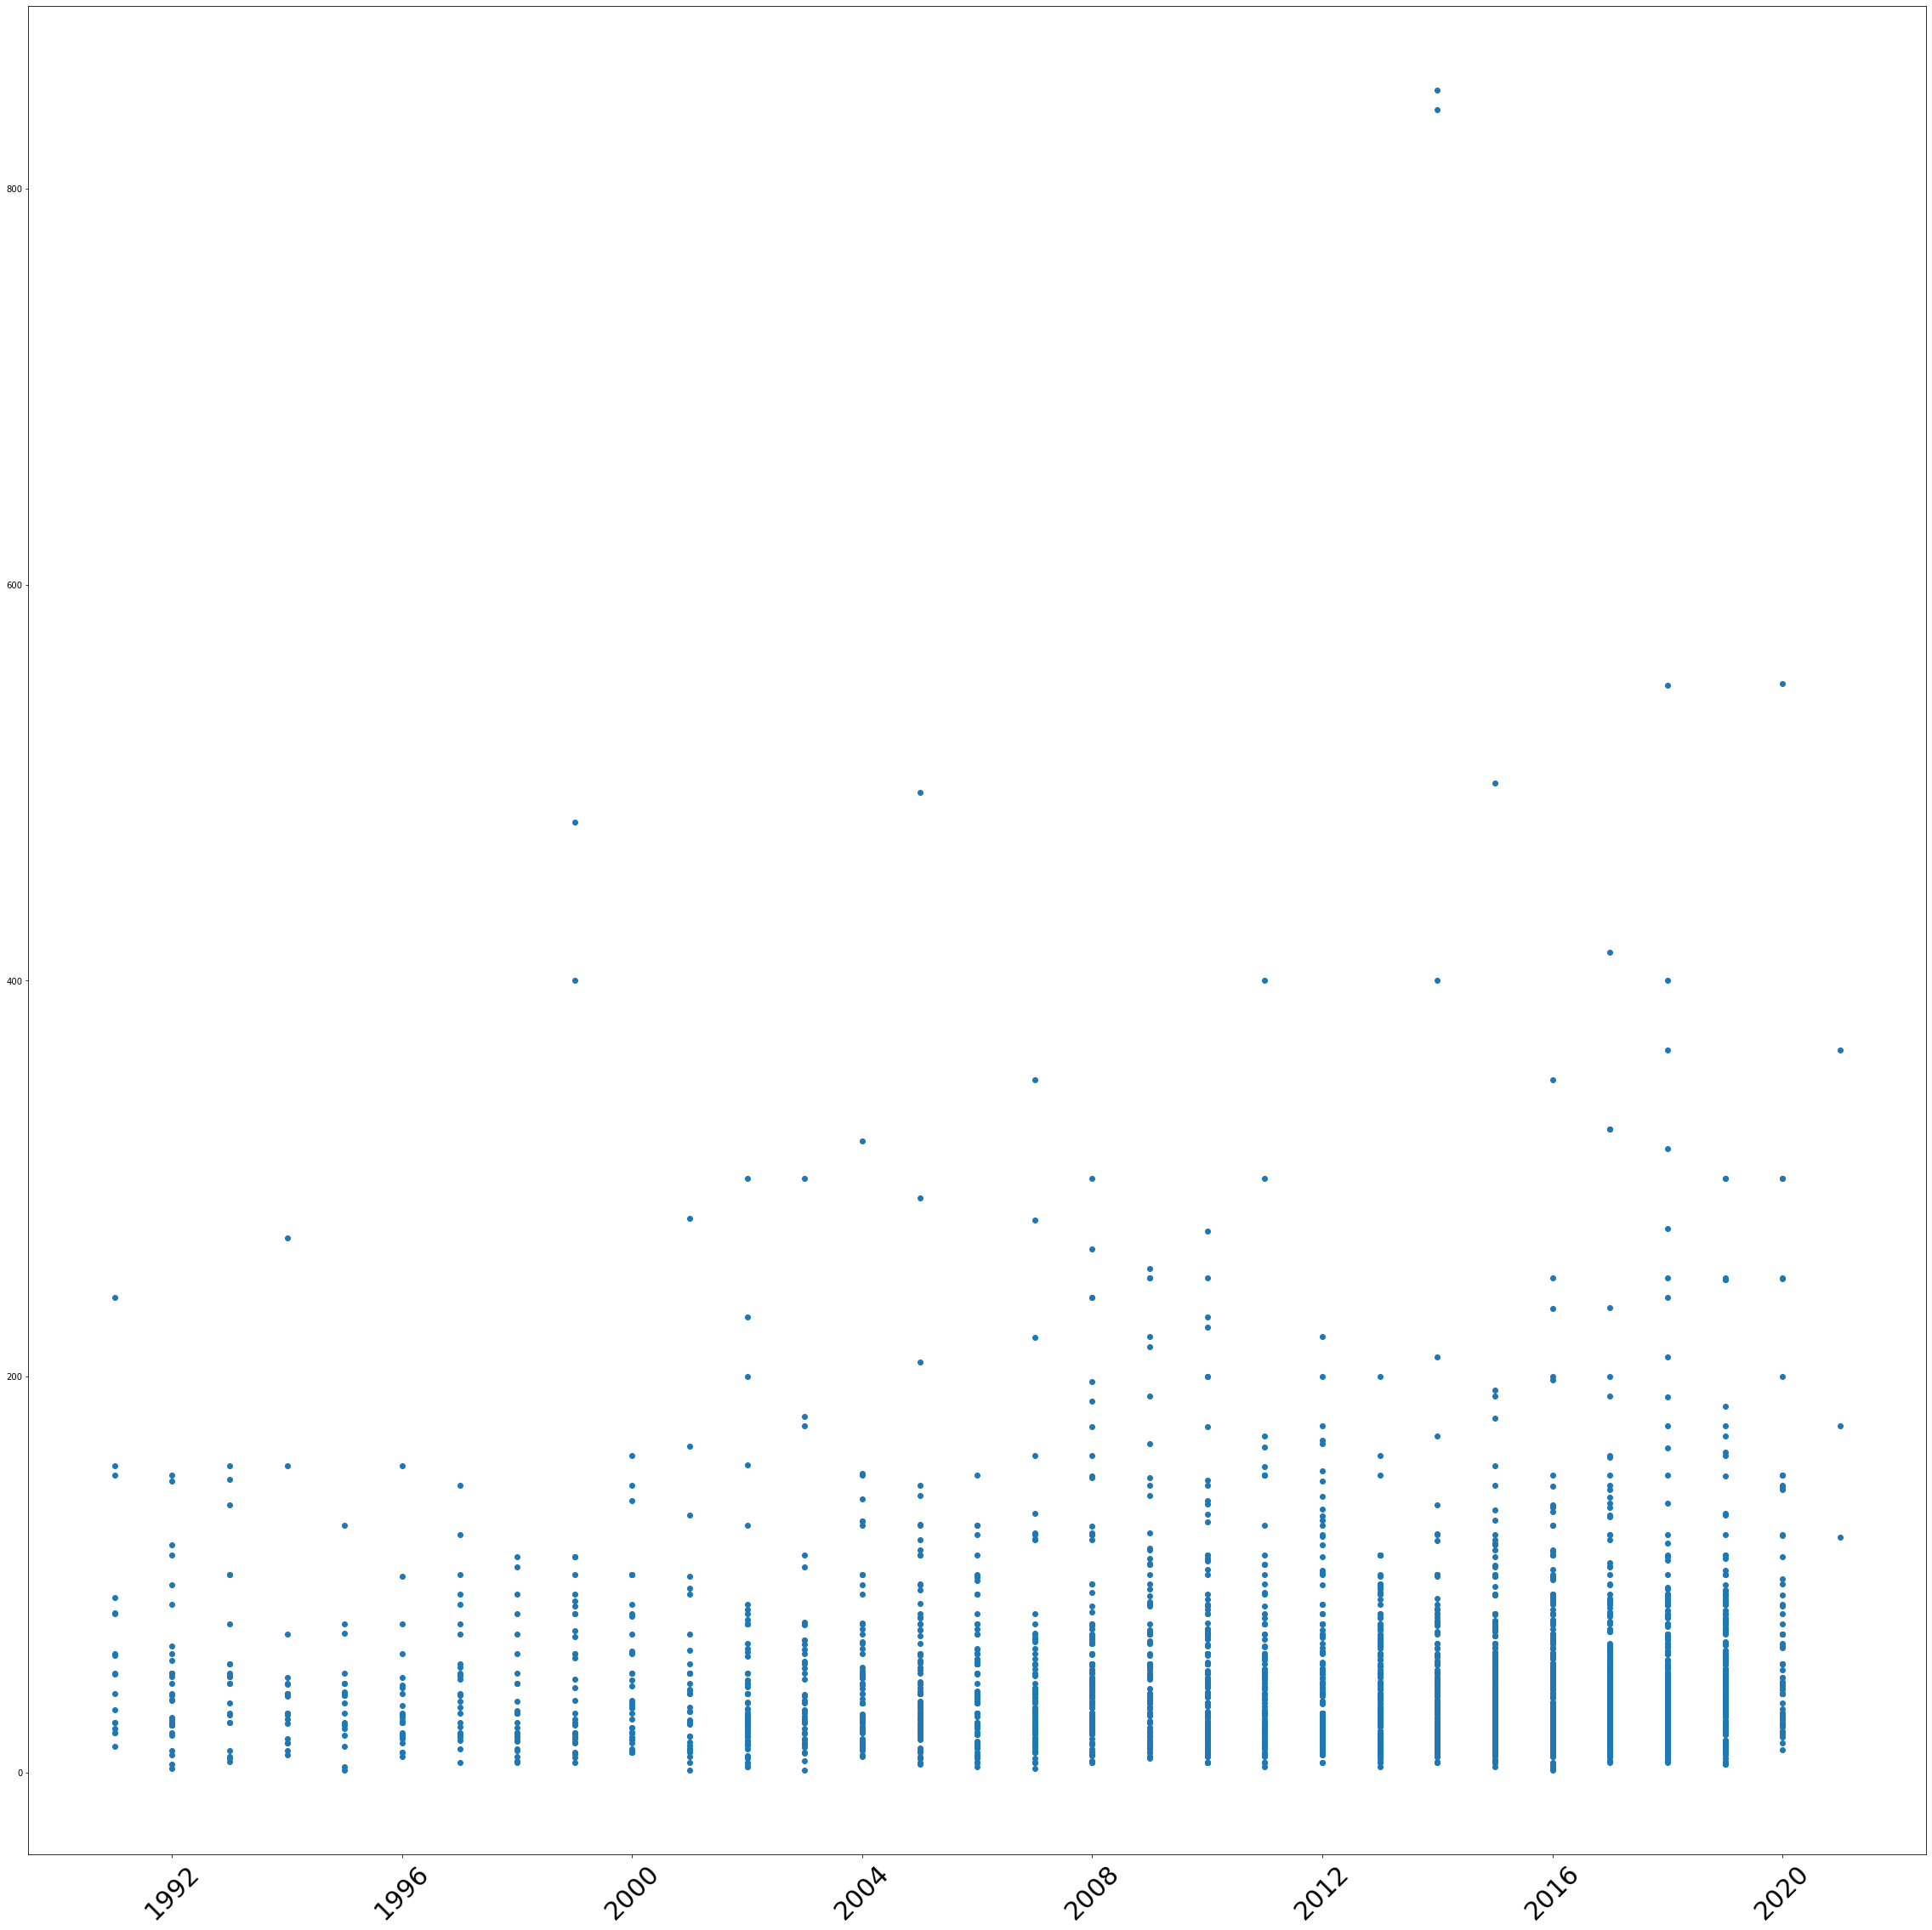

In [10]:
plt.figure(figsize=(40,40))
plt.scatter(time_sorted[time_sorted.yearpublished_dt > '1990'].yearpublished_dt, time_sorted[time_sorted.yearpublished_dt > '1990'].price_mkt)
plt.xticks(size = 30, rotation = 45);

#### Warning
The following looks only at places where `df.price_mkt` is not null, leaving about 3300/10,000

In [11]:
df_price = df.copy()
df_price.loc[df['price_mkt'].isnull(), 'price_mkt'] = df['walmart_price']
df_price= df[df['price_mkt'].notna()]
df_price = df_price[df_price.price_mkt < 150]
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 1 to 10016
Columns: 113 entries, link to quality_pub
dtypes: datetime64[ns](1), float64(92), int64(10), object(10)
memory usage: 2.8+ MB


In [12]:
smaller_price = df_price[['rating', 'price_mkt','avgweight','strategy_war', 'family', 'abstract', 'rating_des', 'rating_pub']]

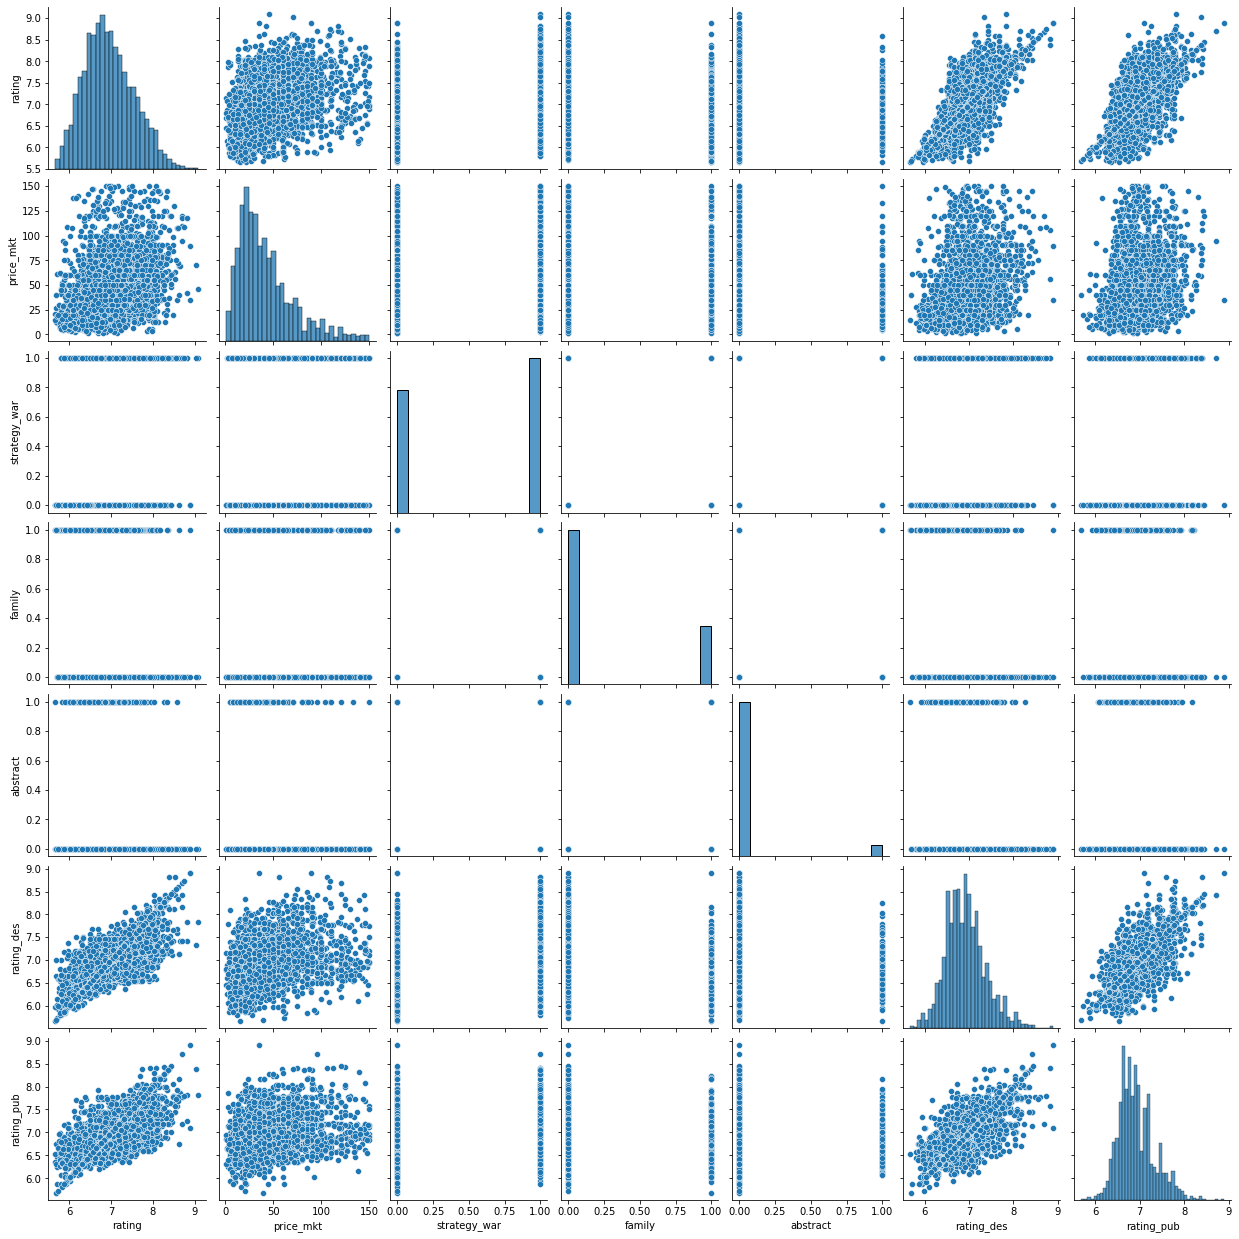

In [13]:
sns.pairplot(smaller_price)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating_des', ylabel='Density'>

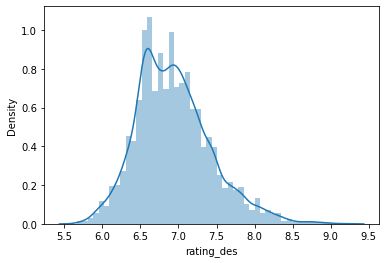

In [14]:
sns.distplot(df['rating_des'])

In [15]:
df[df.rating_des == df.rating_des.min()].designer

3721           Roy Parsons
6669    William Stephenson
Name: designer, dtype: object

In [16]:
df[df.price_mkt == df.price_mkt.median()]

,link,rank,desc,geek,rating,num_voters,price,average,avgweight,baverage,...,thematic_pub,war_pub,party_pub,abstract_pub,numpub,yearpublished_dt,diff_des,diff_pub,quality_des,quality_pub
1679,/boardgame/15510/tower-babel,1727.0,Tower of Babel\n(2005),6.175,6.62,2258,/boardgame/15510/tower-babel/marketplace/geekm...,6.62499,2.3344,6.17461,...,0.000000,0.072464,0.014493,0.072464,69.0,2005-01-01,0.078811,-0.283043,1,0
3554,/boardgame/29382/rock-marne,7205.0,Rock of the Marne\n(2008),5.592,6.69,134,/boardgame/29382/rock-marne/marketplace/geekma...,6.69478,2.4348,5.59227,...,0.000000,1.000000,0.000000,0.000000,64.0,2008-01-01,-0.065000,-1.035625,0,0
3607,/boardgame/21920/leonardo-da-vinci,1264.0,Leonardo da Vinci\n(2006),6.358,6.76,3354,/boardgame/21920/leonardo-da-vinci/marketplace...,6.76061,3.1864,6.35799,...,0.172414,0.241379,0.206897,0.000000,29.0,2006-01-01,-0.364286,0.097931,0,1
4345,/boardgame/121409/1969,5131.0,1969\n(2012),5.669,6.36,406,/boardgame/121409/1969/marketplace/geekmarket,6.35611,2.2941,5.66871,...,0.000000,0.000000,0.000000,0.000000,2.0,2012-01-01,-0.333333,-0.190000,0,0
5070,/boardgame/164812/roll-it-deluxe-edition,2092.0,Roll For It! Deluxe Edition\n(2014),6.062,6.63,1794,/boardgame/164812/roll-it-deluxe-edition/marke...,6.62909,1.0984,6.06210,...,0.076923,0.153846,0.076923,0.230769,13.0,2014-01-01,0.185000,0.019231,1,1
8025,/boardgame/64/joan-arc,5269.0,Joan of Arc\n(1998),5.662,6.28,434,/boardgame/64/joan-arc/marketplace/geekmarket,6.27767,2.5424,5.66230,...,0.021277,1.000000,0.000000,0.000000,47.0,1998-01-01,-0.548889,-1.301489,0,0
8499,/boardgame/178944/battalia-creation,2416.0,BATTALIA: The Creation\n(2015),5.988,7.44,805,/boardgame/178944/battalia-creation/marketplac...,7.4427,3.4857,5.98804,...,0.000000,0.000000,0.000000,0.000000,1.0,2015-01-01,0.000000,0.000000,1,1
9519,/boardgame/175023/crows-overkill,6520.0,Crows Overkill\n(2014)\n\n\n\t\t\tKill birds t...,5.611,6.42,223,/boardgame/175023/crows-overkill/marketplace/g...,6.41614,1.1429,5.61080,...,0.000000,0.000000,0.000000,0.000000,1.0,2014-01-01,0.000000,0.000000,1,1


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.impute import SimpleImputer

## Try with mean for NA
Using fillna with mean to check coefficients before finally choosing features from main DF. 

In [18]:
avg_nan = df.fillna(df.mean())

<ipython-input-18-05b27630c90c>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avg_nan = df.fillna(df.mean())


In [19]:
lr = LinearRegression()

X = avg_nan[['avgweight', 'strategy_war','family', 'abstract', 'thematic','rating_des', 'rating_pub']]

y = avg_nan['price_mkt']
lr.fit(X, y)

lr.score(X, y), lr.coef_

(0.059145123107722575,
 array([ 5.97557735, -1.99056094, -1.40524309, -2.94168817,  8.02477399,
         1.88696268,  5.34206322]))

In [20]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [21]:
predicts = lr.predict(X_test)

Text(0, 0.5, 'Predicted Price')

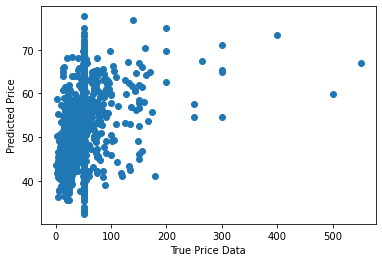

In [22]:
plt.scatter(y_test, predicts)
plt.xlabel('True Price Data')
plt.ylabel('Predicted Price')

**The above shows the problem with simply filling by mean**
There is a vertical line seen where the mean is. A different method should be used. 

### Let's try imputing 0.99 (the min price) for NaN

In [23]:
min_na = df.fillna(df.min())
#min_na.loc[df['price_mkt'].isnull(),'price_mkt']=df.price_mkt.min()
#min_na.
min_na.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10018
Data columns (total 113 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   link                 10018 non-null  object        
 1   rank                 10018 non-null  float64       
 2   desc                 10018 non-null  object        
 3   geek                 10018 non-null  float64       
 4   rating               10018 non-null  float64       
 5   num_voters           10018 non-null  int64         
 6   price                10018 non-null  object        
 7   average              10018 non-null  object        
 8   avgweight            10018 non-null  object        
 9   baverage             10018 non-null  float64       
 10  maxplayers           10018 non-null  float64       
 11  maxplaytime          10018 non-null  float64       
 12  minage               10018 non-null  float64       
 13  minplayers           10018 non

In [24]:
lr = LinearRegression()

X = min_na[['avgweight', 'strategy_war','family', 'abstract', 'thematic','rating_des', 'rating_pub']]

y = min_na[['price_mkt']]
lr.fit(X, y)

lr.score(X, y), lr.coef_

(0.05448419921751524,
 array([[ 8.66841558, -4.60716217,  1.72988932, -6.77492981,  9.86843551,
          1.63924858,  4.46534775]]))

In [25]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [26]:
predicts = lr.predict(X_test)

Text(0, 0.5, 'Predicted Price')

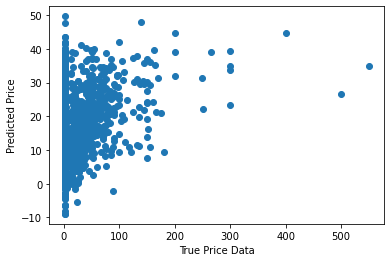

In [27]:
plt.scatter(y_test, predicts)
plt.xlabel('True Price Data')
plt.ylabel('Predicted Price')

**Similar issue to above, now there's a line of former NaN values at 0**<br>
Another issue to note, I am bulk assigning to all features. This might not make sense in all places. For example, this picks 0, or no, for dummy variables. 

## Recent Boardgames Only
In order to elimiate strange values for older games, let's narrow focus to the last 10 years. Older games may be out of print and collector items therefore providing extreme outlier price points. 

In [29]:
recent = df[df['yearpublished_dt'] > '2010']
recent.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5881 entries, 0 to 10017
Data columns (total 113 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   link                 5881 non-null   object        
 1   rank                 5881 non-null   float64       
 2   desc                 5881 non-null   object        
 3   geek                 5881 non-null   float64       
 4   rating               5881 non-null   float64       
 5   num_voters           5881 non-null   int64         
 6   price                5881 non-null   object        
 7   average              5881 non-null   object        
 8   avgweight            5881 non-null   object        
 9   baverage             5881 non-null   float64       
 10  maxplayers           5881 non-null   float64       
 11  maxplaytime          5881 non-null   float64       
 12  minage               5881 non-null   float64       
 13  minplayers           5881 non-n

**Unfortunately only about $1/4$ to $1/3$ of data has price data, regardless of date limited**

**Eliminate high prices**<br>
Many games can be very expensive

In [30]:
no_highprice = recent.copy()
no_highprice['price_mkt'] = np.where((recent.price_mkt > 200),200,recent.price_mkt)
no_highprice.price_mkt.max()

200.0

In [31]:
no_highprice.price_mkt.mean(), df.price_mkt.mean()

(46.34920919656392, 50.676515606242496)

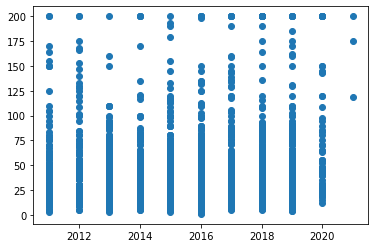

In [32]:
plt.scatter(no_highprice.yearpublished_dt, no_highprice.price_mkt)

#### Imputing (KNN) seems to offer a solution

Let's try imputing with KNN

In [33]:
from sklearn.impute import KNNImputer

In [34]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imp_vals = imputer.fit_transform(X)

In [98]:
lr = LinearRegression()

X = no_highprice[['avgweight', 'strategy_war','family', 'abstract', 'thematic','rating_des', 'rating_pub']]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imp_vals = imputer.fit_transform(X)

In [99]:
y = no_highprice[['price_mkt']]
imp_y = imputer.fit_transform(y)
lr.fit(imp_vals, imp_y)
lr.score(imp_vals, imp_y), lr.coef_

(0.10244028349956324,
 array([[ 5.76524111, -0.06895041, -0.95758264, -2.17327245,  4.83077462,
          3.00785064,  3.98702852]]))

In [121]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(imp_vals, imp_y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [122]:
predicts = lr.predict(X_test)

Text(0, 0.5, 'Predicted Price')

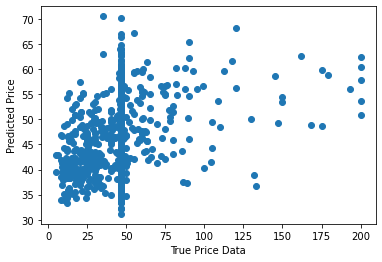

In [123]:
plt.scatter(y_test, predicts)
plt.xlabel('True Price Data')
plt.ylabel('Predicted Price')

**Doubled our R2, and the scatter looks more linear** However, is this a fair approach? It looks very similar to the mean approach taken above. However the R2 is still higher.
### Let's try MICE

In [124]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [125]:
lr = LinearRegression()

X = no_highprice[['avgweight', 'strategy_war','family', 'abstract', 'thematic','rating_des', 'rating_pub']]
imputer = IterativeImputer()
imp_vals = imputer.fit_transform(X)

In [126]:
y = no_highprice[['price_mkt']]
imp_y = imputer.fit_transform(y)
lr.fit(imp_vals, imp_y)
lr.score(imp_vals, imp_y), lr.coef_

(0.1027994886188528,
 array([[ 5.72190751, -0.0665867 , -0.96421277, -2.18550831,  4.81844996,
          3.24143939,  3.83690723]]))

In [127]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(imp_vals, imp_y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [128]:
predicts = lr.predict(X_test)

Text(0, 0.5, 'Predicted Price')

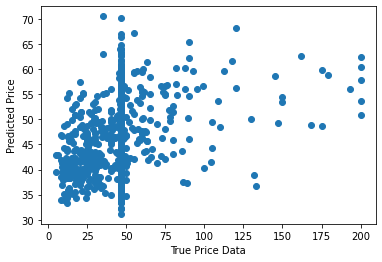

In [129]:
plt.scatter(y_test, predicts)
plt.xlabel('True Price Data')
plt.ylabel('Predicted Price')

The iterative imputer shows nearly identical results. Similarly, the R2 is doubled, but the imputed results are very similar.  

In [130]:
lr.predict([[3, 1, 0, 0, 1, 3.5, 4]])

array([[32.30397943]])

In [131]:
lr_model_ridge = RidgeCV()
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train, lr_model_ridge.coef_))

[(array([1.8649    , 0.        , 0.        , 1.        , 0.        ,
         6.695     , 7.18907407]),
  array([ 5.59733558, -0.68881243, -1.59672684, -2.59328552,  5.63719946,
          2.63853899,  3.5783415 ]))]

## Let's Build some models around a different Output.
### Let's anticipate how a new game might rank on BGG.

In [283]:
lr = LinearRegression()

X = df[['avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub']]
imputer = IterativeImputer()
imp = imputer.fit_transform(X)
y = min_na[['rank']]
lr.fit(imp, y)

lr.score(imp, y), lr.coef_

(0.48846319821968587,
 array([[ -462.73990671,  -415.07723113,  1156.50111789,  -493.44561258,
           808.32127761,  -478.54513996, -3660.07304411, -2326.02978537]]))

**Reasons for features**: I assume that we can know many things about a new game, but we cannot know others. For example, the designer, the publisher, their qualities and ratings can all be known, but the individual new game's rating is not yet known (until after release and testing). I assume a publisher wants to know where a game might rank in BGG ranking system. Unlike the pure user voted 'Rating', 'Geek' is BGG own rating system. I use geek scores for designer and publisher. I also consider the year a game was published, as quality games may take time to rise through BGG ranking system. 

In [247]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(imp, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [248]:
predicts = lr.predict(X_test)

Text(0, 0.5, 'Predicted Rankings')

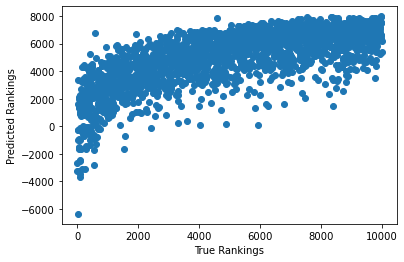

In [249]:
plt.scatter(y_test, predicts)
plt.xlabel('True Rankings')
plt.ylabel('Predicted Rankings')

In [250]:
lr.score(X_test, y_test)

0.49569788497261125

In [251]:
lr_model_ridge = RidgeCV()
lr_model_ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [252]:
df[df.geek_des == df.geek_des.max()].geek_des

1634    8.221
Name: geek_des, dtype: float64

In [263]:
df_sub = df[['avgweight', 'strategy', 'strategy_war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub', 'rank','price_mkt']]
df_sub.corr()

,strategy,strategy_war,family,abstract,thematic,geek_des,geek_pub,rank,price_mkt
strategy,1.000000,0.491723,-0.077284,-0.136516,-0.043377,0.264388,0.256497,-0.316906,0.047247
strategy_war,0.491723,1.000000,-0.436133,-0.319018,-0.193041,-0.049076,-0.041896,0.082976,0.095452
family,-0.077284,-0.436133,1.000000,-0.052908,-0.136487,0.095733,0.078519,-0.148076,-0.148856
abstract,-0.136516,-0.319018,-0.052908,1.000000,-0.108324,-0.078787,-0.064801,0.112461,-0.086480
thematic,-0.043377,-0.193041,-0.136487,-0.108324,1.000000,0.113586,0.094551,-0.150068,0.178282
geek_des,0.264388,-0.049076,0.095733,-0.078787,0.113586,1.000000,0.635802,-0.620296,0.151238
geek_pub,0.256497,-0.041896,0.078519,-0.064801,0.094551,0.635802,1.000000,-0.548723,0.147521
rank,-0.316906,0.082976,-0.148076,0.112461,-0.150068,-0.620296,-0.548723,1.000000,-0.160989
price_mkt,0.047247,0.095452,-0.148856,-0.086480,0.178282,0.151238,0.147521,-0.160989,1.000000


In [287]:
#'avgweight', 'strategy','war','family', 'abstract', 'thematic', 'geek_des', 'geek_pub'
lr.predict([[2.35, 0, 1, 0, 0, 1, 5.6052, 5.633]])

array([[6983.11062694]])

In [286]:
df[df['rank'] == 5904].geek_pub

9372    5.633
Name: geek_pub, dtype: float64

In [45]:
year_group = df.groupby(by='yearpublished').mean()
df['price_avgy'] = year_group.price_mkt
#df.price_mkt, df.price_avgy
#df[df.price_mkt.isnull()].price_mkt = df.price_avgy

In [46]:
df.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10018
Data columns (total 114 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   link                 10018 non-null  object        
 1   rank                 10018 non-null  float64       
 2   desc                 10018 non-null  object        
 3   geek                 10018 non-null  float64       
 4   rating               10018 non-null  float64       
 5   num_voters           10018 non-null  int64         
 6   price                10018 non-null  object        
 7   average              10018 non-null  object        
 8   avgweight            10018 non-null  object        
 9   baverage             10018 non-null  float64       
 10  maxplayers           10018 non-null  float64       
 11  maxplaytime          10018 non-null  float64       
 12  minage               10018 non-null  float64       
 13  minplayers           10018 non

In [47]:
lr_model_ridge = RidgeCV()
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

[('avgweight',
  array([ 8.18169705, -3.1088178 ,  2.82359301, -6.11538735,  8.6310656 ,
          0.23792132,  4.42134379]))]

In [192]:
ridge_predict = lr_model_ridge.predict(X_test)

Text(0, 0.5, 'Predicted Ridge Rankings')

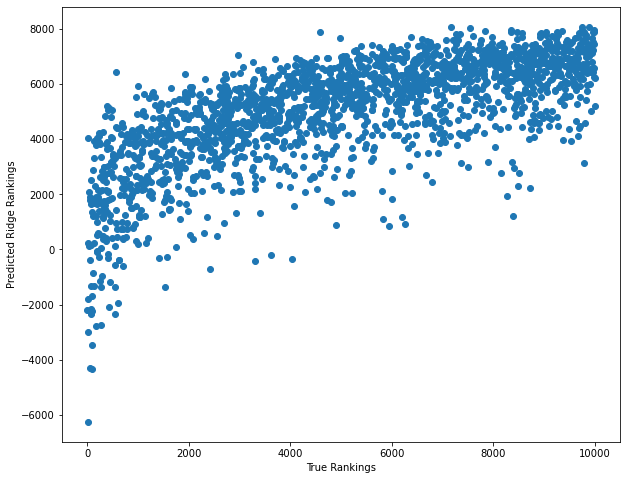

In [282]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, ridge_predict)
plt.xlabel('True Rankings')
plt.ylabel('Predicted Ridge Rankings')

In [48]:
no_na_des = df_price[~df_price.numdes.isna()]

In [49]:
corr_no_na_des = no_na_des.corr()

In [50]:
corr_no_na_des.rating.sort_values().tail(30)

baverage_pub           0.237537
numplays_month         0.237827
strategy_war_des       0.244901
views_des              0.258674
numwish_pub            0.263189
numfans_pub            0.265729
numwanting_pub         0.272009
strategy_war_pub       0.276110
numfans_des            0.291335
price_mkt_des          0.303021
numfans                0.304350
numwish_des            0.308440
views                  0.314116
price_mkt_pub          0.319587
numwanting_des         0.320403
geek_des               0.330681
baverage_des           0.330695
numwishlistcomments    0.370223
price_mkt              0.376376
numwish                0.398824
numwanting             0.434009
quality_des            0.437812
geek                   0.489853
baverage               0.489869
quality_pub            0.561977
diff_des               0.635192
rating_pub             0.657195
diff_pub               0.729705
rating_des             0.754866
rating                 1.000000
Name: rating, dtype: float64

In [51]:
lr = LinearRegression()

X = avg_nan[['avgweight', 'minplaytime',  'strategy', 'war', 'family', 'numfans_des', 'numfans_pub']]

y = avg_nan['rating']
lr.fit(X, y)

lr.score(X, y), lr.coef_

(0.2679204326117687,
 array([ 3.28845481e-01, -4.69439219e-05, -2.14034091e-02,  1.17239844e-01,
        -4.44051262e-02,  4.32666400e-04,  2.96183349e-04]))

In [52]:
p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr_full = LinearRegression()
lr_full.fit(X_poly, y)
lr_full.score(X_poly, y)

0.2996935135238321

In [53]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [54]:
X_train.shape, X_test.shape

((6010, 7), (2004, 7))

In [55]:
lasso_model = LassoCV()
lasso_model.fit(X_train, y_train)
list(zip(X_train.columns, lasso_model.coef_))

[('avgweight', 0.3079586077889091),
 ('minplaytime', 2.377651099280624e-06),
 ('strategy', -0.0),
 ('war', 0.03206252907188523),
 ('family', -0.0),
 ('numfans_des', 0.0004345319630167388),
 ('numfans_pub', 0.00028210637677306437)]

In [56]:
lasso_model.coef_

array([ 3.07958608e-01,  2.37765110e-06, -0.00000000e+00,  3.20625291e-02,
       -0.00000000e+00,  4.34531963e-04,  2.82106377e-04])

In [57]:
lr_model_ridge = RidgeCV()
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

[('avgweight', 0.32903972866372216),
 ('minplaytime', -3.0583150962826267e-05),
 ('strategy', -0.025714512362068086),
 ('war', 0.10909005258679838),
 ('family', -0.036493127225164755),
 ('numfans_des', 0.0004526643950160114),
 ('numfans_pub', 0.00029721115201719606)]

In [58]:
test_set_pred = lasso_model.predict(X_test)

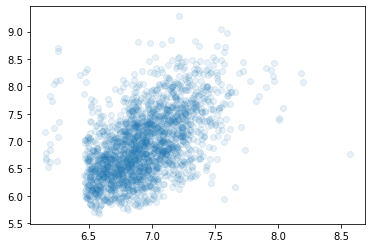

In [59]:
plt.scatter(test_set_pred, y_test, alpha=.1)

In [395]:
r2_score(y_test, test_set_pred)

0.5927153003994861

In [444]:
lr.predict([3,1])

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

ValueError: x and y must be the same size

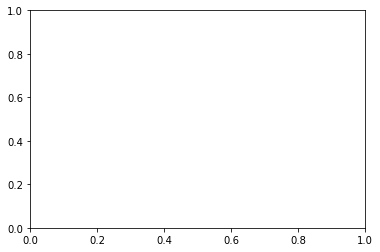

In [445]:
plt.scatter(X, y,color='g')
plt.plot(X, lr.predict(X),color='k')